<a href="https://colab.research.google.com/github/dbtjr1103/mainpj/blob/main/yolov5_300_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=3cf4a0ae8a0e980941ddd46a71b65f10d9251f2b2adfbf4e7e9f95be6faede3a
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

In [ ]:
cd /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5

/content/drive/MyDrive/Longterm_project/yolov5_final


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15143, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15143 (delta 0), reused 3 (delta 0), pack-reused 15138
Receiving objects: 100% (15143/15143), 14.07 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (10385/10385), done.
/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5


In [ ]:
!pip install -qr requirements.txt  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.2.0 which is incompatible.


In [ ]:
# 런타임 재시작 후
%cd /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5

/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5


In [ ]:
# dataset down
from roboflow import Roboflow
rf = Roboflow(api_key="SseYdmaNMk2zCfN7zILH")
project = rf.workspace("mainproject").project("final-ndspw")
dataset = project.version(9).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to final-9 in yolov5pytorch:: 100%|██████████| 12731/12731 [01:06<00:00, 190.91it/s]


In [ ]:
# data.yaml 한글라벨 수정 후
import torch
import utils
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download
%cat /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/final-9/data.yaml

names:
- "BR민트초코우유"
- "BR베리베리스트로베리우유"
- "BR이상한나라의솜사탕우유"
- "BR쿠키앤크림우유"
- "KGB맥주레몬보드카병"
- "OMG캔"
- "강릉커피너티크림라떼"
- "고길동에일맥주캔"
- "고티카빈티지라떼"
- "고티카빈티지블랙"
- "고티카빈티지스위트아메리카노"
- "곰표썸머에일캔"
- "광동제약비타500"
- "구스아일랜드312얼반위트"
- "구스아일랜드덕덕구스캔"
- "구스아일랜드아이피에이캔"
- "기네스드레프트캔"
- "기네스엑스트라스타우드캔"
- "기린이치방시보리캔"
- "까스활명수"
- "나랑드사이다캔245"
- "남양초코에몽250ML"
- "네스퀵초코"
- "농심웰치스포도355ml"
- "닥터유단백질바나나"
- "닥터유단백질초코"
- "닥터유프로단백질초코250ml"
- "닥터캡슐프로텍트베리믹스"
- "닥터캡슐프로텍트사과"
- "닥터캡슐프로텍트플레인"
- "더단백초코"
- "더단백카라멜"
- "더단백커피"
- "덴마크드링킹요구르트딸기"
- "덴마크드링킹요구르트사과"
- "덴마크드링킹요구르트샤인머스켓"
- "덴마크드링킹요구르트플레인"
- "덴마크딸기딸기"
- "덴마크민트초코"
- "덴마크바나나우유"
- "덴마크얼라이브망고"
- "덴마크얼라이브머스캣청포도"
- "덴마크얼라이브블러드오렌지"
- "덴마크얼라이브스위트자몽"
- "덴마크초코초코"
- "델몬트콜드오렌지"
- "델몬트콜드포도"
- "동아데미소다애플250ML"
- "동아데미소다오렌지250ML"
- "동아오츠카데자와로얄밀크티500ML"
- "동아포카리스웨트캔240ML"
- "라떼니스타카라멜라떼"
- "라떼니스타크리미라떼"
- "랩노쉬프로틴마일드라떼350ml"
- "랩노쉬프로틴마일드카카오350ml"
- "레쓰비마일드커피"
- "레쓰비카페타임라떼"
- "레쓰비카페타임헤이즐넛라떼"
- "레츠프레시투데이캔"
- "로스터리슈크림라떼"
- "로스터리아메리카노"
- "로스터리에스프레소벨벳라떼"
- "롯데립톤아이스티복숭아500ML"
- "롯데게토레이240ML"
- "롯데델몬트알로

In [ ]:
## roboflow 파일 중 라벨이 비어있는 경우가 있어, 해당 이미지와 라벨 삭제
import os

def count_empty_txt_files(path):
  # 비어있는 .txt 파일 개수 찾기

  count = 0
  for filename in os.listdir(path):
      if filename.endswith(".txt"):
          file_path = os.path.join(path, filename)
          if os.path.getsize(file_path) == 0:
              count += 1
  return count

def count_files_in_folder(folder_path):
    # 폴더 내 총 파일 개수
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

def delete_empty_txt_files_and_images(txt_path, img_path):
    #해당 .txt 와 .jpg 삭제
    empty_files = []
    for dirpath, dirnames, filenames in os.walk(txt_path):
        for filename in filenames:
            if filename.endswith(".txt"):
                txt_file_path = os.path.join(dirpath, filename)
                if os.path.getsize(txt_file_path) == 0:
                    empty_files.append(txt_file_path)
                    os.remove(txt_file_path)
                    img_file_path = os.path.join(img_path, filename.replace(".txt", ".jpg"))
                    if os.path.exists(img_file_path):
                        os.remove(img_file_path)
    return empty_files

In [ ]:
count_empty_txt_files('final-9/train/labels')

172

In [ ]:
count_files_in_folder('final-9/train/images')

5308

In [ ]:
delete_empty_txt_files_and_images('final-9/train/labels','final-9/train/images')
print(count_files_in_folder('final-9/train/images'))
print(count_files_in_folder('final-9/train/labels'))

5136
5136


In [ ]:
print(count_empty_txt_files('final-9/valid/labels'))
print(count_files_in_folder('final-9/valid/images'))

24
896


In [ ]:
delete_empty_txt_files_and_images('final-9/valid/labels','final-9/valid/images')
print(count_files_in_folder('final-9/valid/images'))
print(count_files_in_folder('final-9/valid/labels'))

872
872


In [ ]:
# /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/data/hyps/hyp.scratch-low.yaml 에서 파라미터 수정
# mosaic: 1.0 -> 0.0, fliplr : 0.5 -> 0.0, scale : 0.5 -> 0.2로 변경

In [ ]:
# 최종 v5 nano, mosaic = 0,patience 10, lr = 0.0001 batch 확인용
!python train.py --img 640 --batch 16 --epochs 1 --data final-9/data.yaml --weights 'yolov5n.pt'

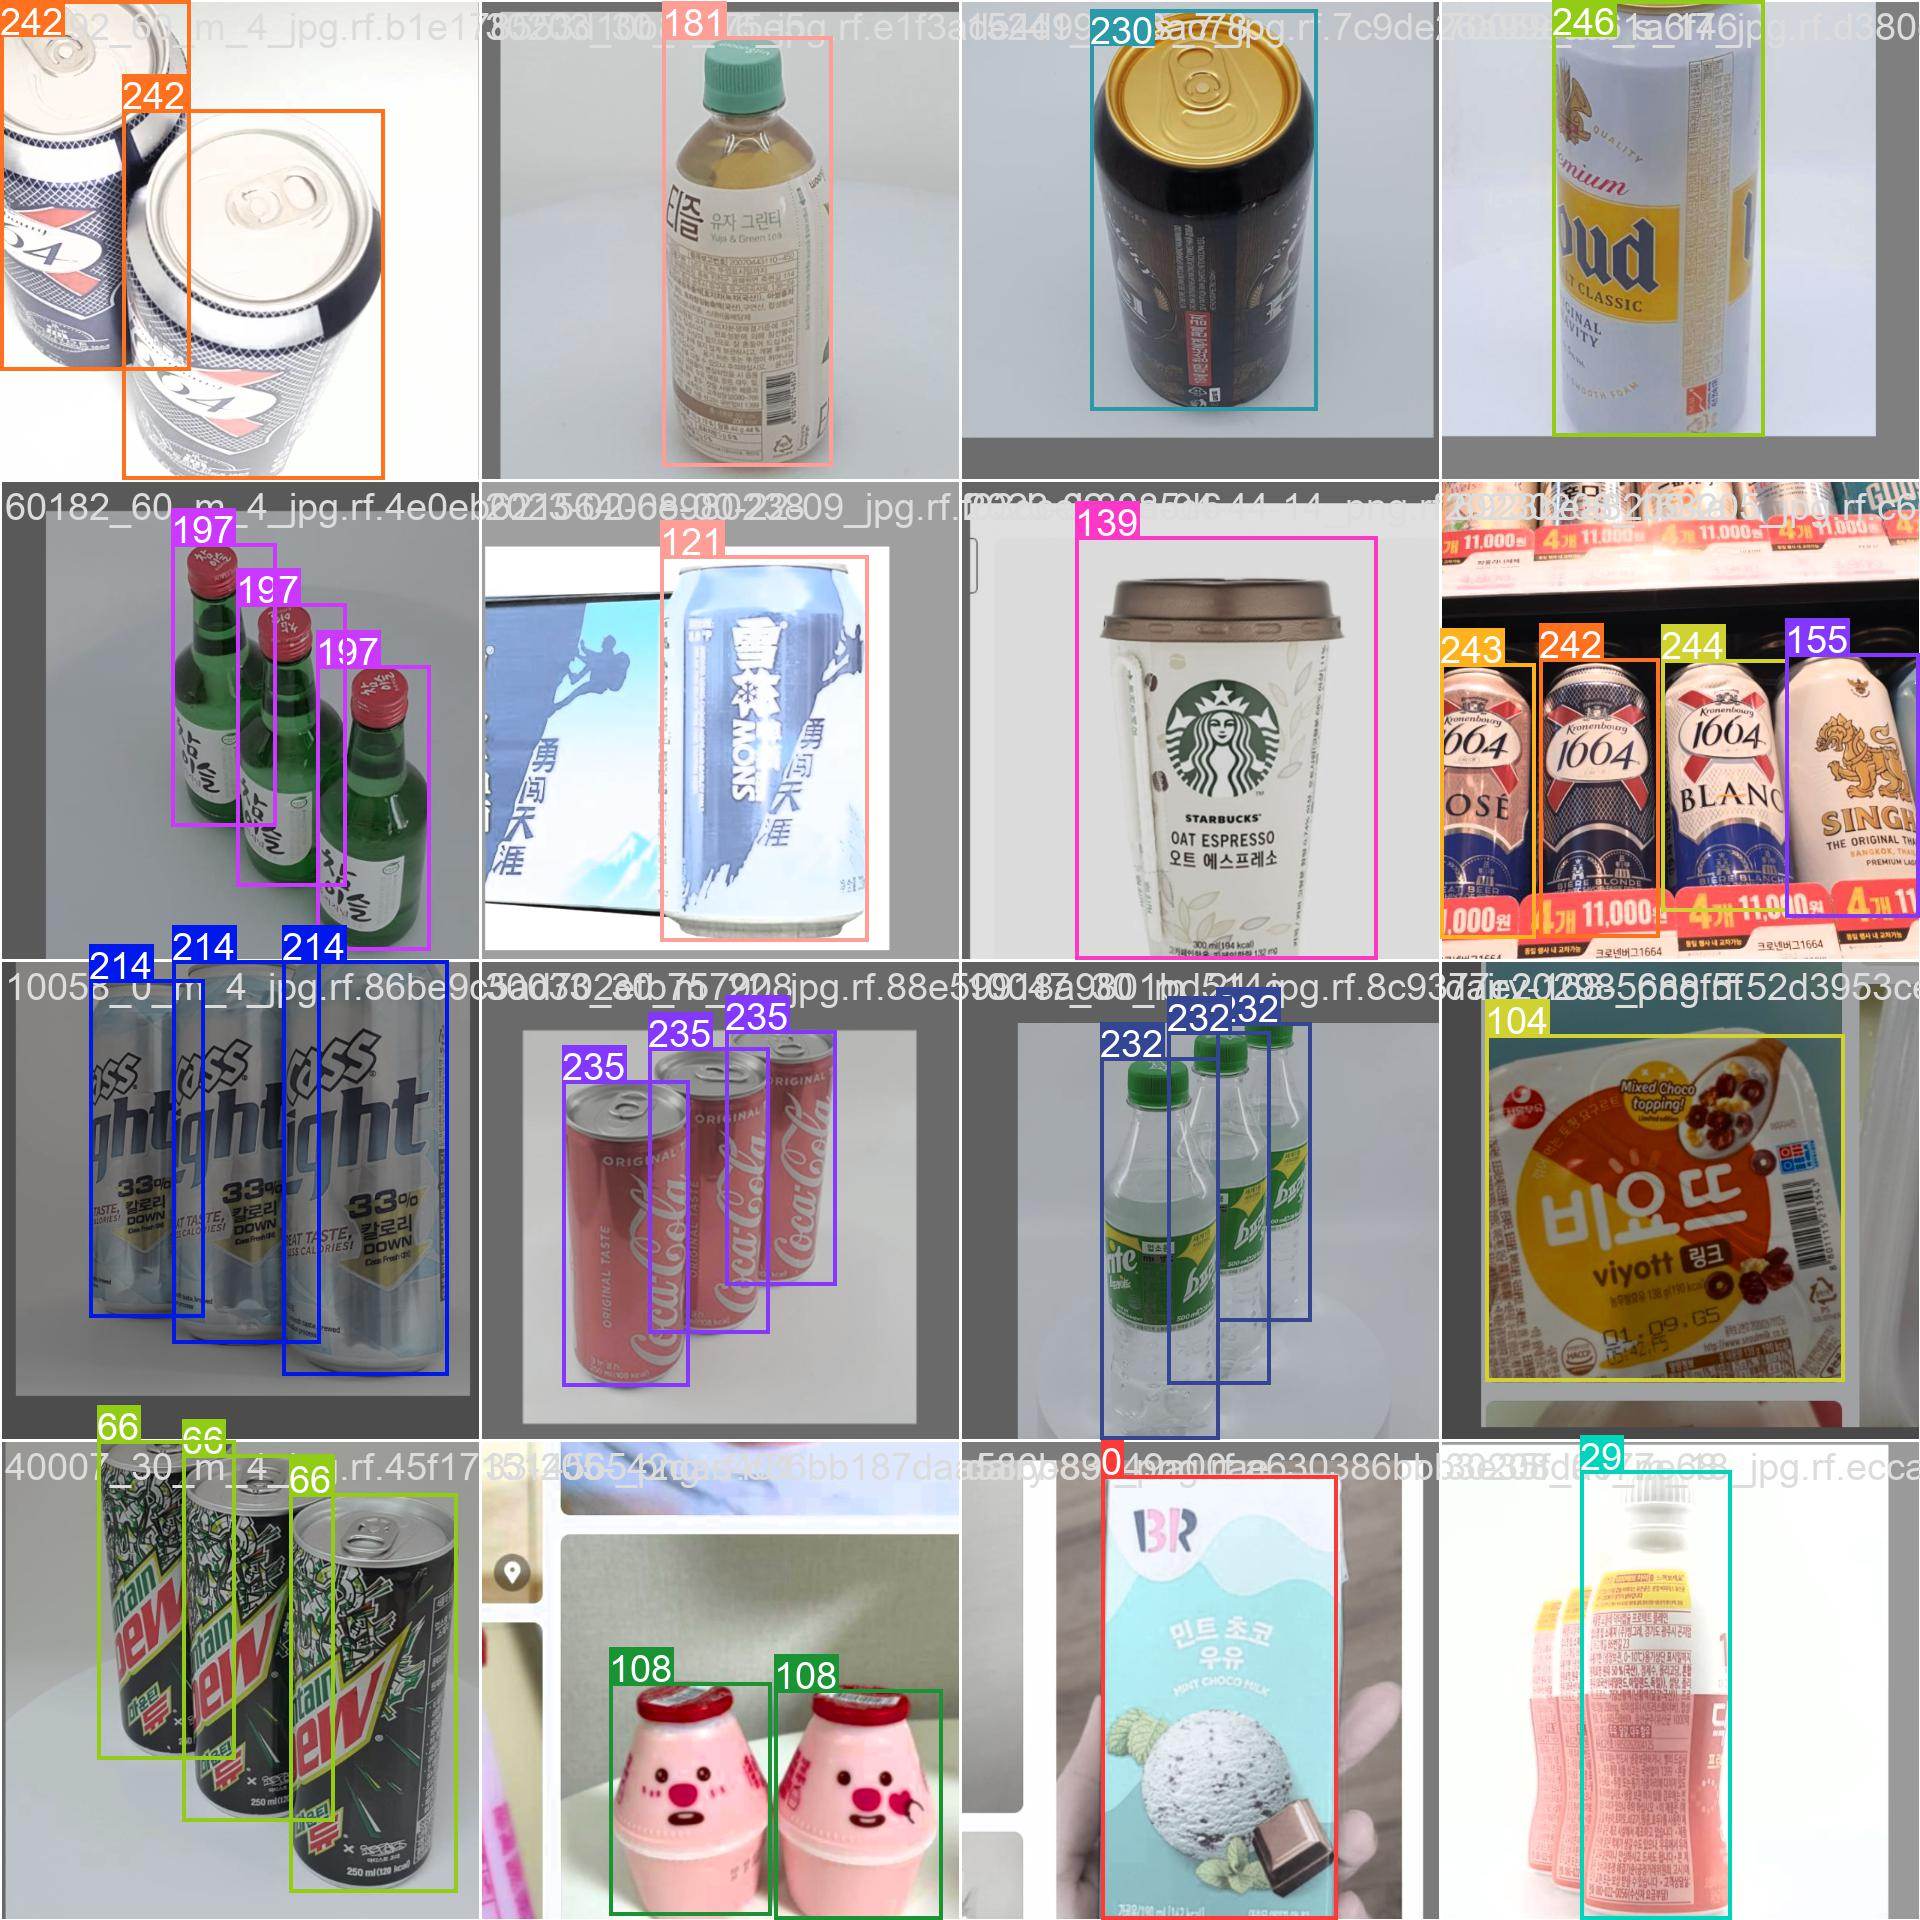

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp/train_batch0.jpg', width = 500, height = 500)
Image('/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp/train_batch1.jpg', width = 500, height = 500)
Image('/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp/train_batch2.jpg', width = 500, height = 500)

In [ ]:
# 최종 v5 nano, mosaic = 0,patience 10, lr = 0.01 
!python train.py --img 640 --batch 32 --epochs 1000 --data final-9/data.yaml --weights 'yolov5n.pt' --patience 10

train: weights=yolov5n.pt, cfg=, data=final-9/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=10, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-100-g4d28fec Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

In [ ]:
!python export.py  --weights /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp2/weights/best.pt --include tflite

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-100-g4d28fec Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 2165065 parameters, 0 gradients, 5.4 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Longterm_project/yolov5_final/yolov5/runs/train/exp2/weights/best.pt with output shape (1, 25200, 305) (4.5 MB)
2023-02-14 05:55:51.345487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512